In [3]:
import pandas as pd

X = pd.read_csv(r"E:\fraud-anamoly-detection\data\processed\transactions_model_matrix_v2.csv")
X.shape

(100000, 9)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
X_scaled.mean(axis=0)
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(
    n_estimators=300,
    contamination=0.01,
    random_state=42
)

iso.fit(X_scaled)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",300
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.01
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [9]:
iso_pred = iso.predict(X_scaled)          
iso_score = iso.decision_function(X_scaled)

In [7]:
print(iso_score)
iso_score.shape

[0.20326863 0.20500884 0.20169831 ... 0.19670488 0.20620312 0.17458212]


(100000,)

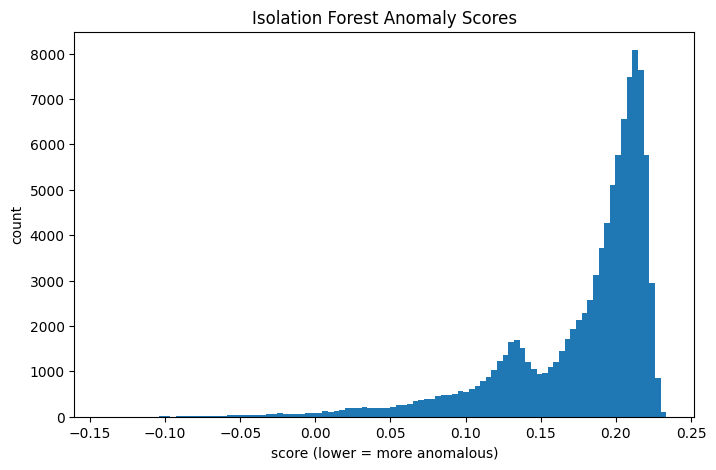

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(iso_score, bins=100)
plt.title("Isolation Forest Anomaly Scores")
plt.xlabel("score (lower = more anomalous)")
plt.ylabel("count")
plt.show()


In [9]:
import numpy as np

top_k = 20
anomaly_idx = np.argsort(iso_score)[:top_k]

X_anomalies = X.iloc[anomaly_idx]
X_anomalies

,amount_dev_log,avg_amount_24h,txn_count_1h,txn_count_24h,time_since_last_txn_sec,distance_from_home,travel_speed_kmh,hour_sin,hour_cos
20462,4.135923,317.142727,3.0,11.0,223.097064,1964.01,20000.000000,1.000000,6.123234e-17
73455,-4.603906,865.033636,3.0,11.0,967.926175,1741.70,6467.550435,-0.500000,-8.660254e-01
53694,3.808620,217.381818,3.0,11.0,244.621575,1005.21,14686.958881,0.000000,1.000000e+00
57837,-7.090104,2481.652000,4.0,5.0,246.369626,1169.73,17160.017133,-0.707107,-7.071068e-01
5663,6.833893,2186.300000,2.0,5.0,430.650977,1827.05,15198.411390,-0.866025,-5.000000e-01
61437,-5.410529,1396.120000,3.0,6.0,619.813568,1813.80,10530.262255,0.500000,-8.660254e-01
79428,5.238647,406.515000,3.0,8.0,170.342219,1179.35,20000.000000,0.707107,-7.071068e-01
65089,5.433373,811.980000,3.0,6.0,810.358650,1964.68,8703.986545,-0.707107,7.071068e-01
96327,7.032596,2417.382500,3.0,12.0,182.278296,6.71,10069.050896,0.866025,-5.000000e-01
75200,-6.783146,3434.551818,2.0,11.0,54.304786,7.40,20000.000000,0.965926,-2.588190e-01


In [10]:
raw_df = pd.read_csv(r"E:\fraud-anamoly-detection\data\raw\transactions_raw.csv")

raw_df.iloc[anomaly_idx][[
    "customer_id",
    "amount",
    "merchant_category",
    "distance_from_home",
    "hour",
    "is_fraud"
]]


,customer_id,amount,merchant_category,distance_from_home,hour,is_fraud
20462,CUST_01018,378.69,retail,1964.01,6,0
73455,CUST_03664,766.16,grocery,1741.70,14,0
53694,CUST_02676,261.47,jewelry,1005.21,0,0
57837,CUST_02886,1282.62,jewelry,1169.73,15,0
5663,CUST_00280,3114.10,jewelry,1827.05,16,0
61437,CUST_03063,1173.37,gas,1813.80,10,0
79428,CUST_03970,593.93,restaurant,1179.35,9,0
65089,CUST_03246,1039.90,jewelry,1964.68,21,0
96327,CUST_04816,3549.35,restaurant,6.71,8,0
75200,CUST_03753,2552.71,electronics,7.40,7,0


In [11]:
import numpy as np

threshold = np.percentile(iso_score, 1)
threshold

np.float64(-3.866395707794541e-17)

In [12]:
iso_anomaly_flag = iso_score < threshold

In [13]:
iso_anomaly_flag.mean() * 100

np.float64(1.0)

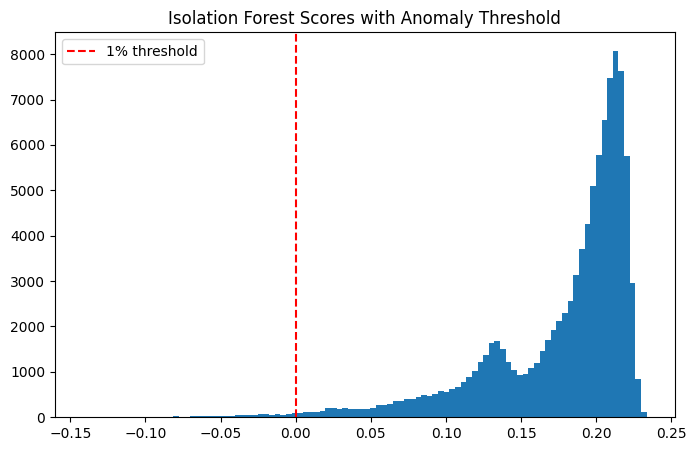

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(iso_score, bins=100)
plt.axvline(threshold, color='red', linestyle='--', label='1% threshold')
plt.legend()
plt.title("Isolation Forest Scores with Anomaly Threshold")
plt.show()


In [15]:
features_df = pd.read_csv("E:/fraud-anamoly-detection/data/processed/transactions_features.csv")

features_df["iso_score"] = iso_score
features_df["iso_anomaly"] = iso_anomaly_flag

In [16]:
assert len(features_df) == len(iso_score) #Prevents silent misalignment bugs

In [17]:
features_df.to_csv(
    "E:/fraud-anamoly-detection/data/processed/transactions_with_iso_baseline.csv",
    index=False
)

In [18]:
import joblib

joblib.dump(scaler, "E:/fraud-anamoly-detection/models/standard_scaler_v1.pkl")
joblib.dump(iso, "E:/fraud-anamoly-detection/models/isolation_forest_v1.pkl")

['E:/fraud-anamoly-detection/models/isolation_forest_v1.pkl']

In [19]:
# Freeze the Model Features and Thresholds
import json

json.dump(
    {"features": X.columns.tolist()},
    open("E:/fraud-anamoly-detection/models/model_features_v1.json", "w"),
    indent=2
)

json.dump(
    {
        "isolation_forest": {
            "percentile": 1,
            "threshold_value": float(threshold)
        }
    },
    open("E:/fraud-anamoly-detection/models/thresholds_v1.json", "w"),
    indent=2
)
